In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
fifa_df = pd.read_csv('fifa.csv')

In [3]:
# Check the first few samples, shape, and info of the data
print(fifa_df.head())
print(fifa_df.shape)
print(fifa_df.info())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

In [4]:
# Drop redundant columns
fifa_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

In [8]:
# Convert "Value", "Wage", "Release Clause" columns to float datatype
def convert_value_wage_release(value):
    if isinstance(value, float):
        return value
    elif 'M' in value:
        return float(value[1:-1]) * 1000000
    elif 'K' in value:
        return float(value[1:-1]) * 1000
    else:
        return float(value[1:])

fifa_df['Value'] = fifa_df['Value'].apply(convert_value_wage_release)
fifa_df['Wage'] = fifa_df['Wage'].apply(convert_value_wage_release)
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(lambda x: convert_value_wage_release(x) if isinstance(x, str) else x)


In [9]:
# Convert "Joined" column to integer data type keeping only the year
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined']).dt.year.astype('Int64')

In [12]:
# Identify the problematic entry in the "Contract Valid Until" column  Convert the column "Contract Valid Until" to pandas datetime type
problematic_entry = fifa_df['Contract Valid Until'][~fifa_df['Contract Valid Until'].str.match(r'^[A-Z][a-z]{2} \d{2}, \d{4}$', na=False)]
print(problematic_entry)


0        2021
1        2022
2        2022
3        2020
4        2023
         ... 
18202    2019
18203    2020
18204    2021
18205    2019
18206    2019
Name: Contract Valid Until, Length: 17019, dtype: object


In [14]:
# Convert "Height" column to float with decimal points
fifa_df['Height'] = fifa_df['Height'].str.replace("'", '.').astype(float)


In [15]:
# Remove "lbs" suffix from "Weight" column and convert to float
fifa_df['Weight'] = fifa_df['Weight'].str.replace('lbs', '').astype(float)


In [16]:
# Check for missing values and impute them
missing_values_percentage = fifa_df.isnull().mean() * 100
print(missing_values_percentage)

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

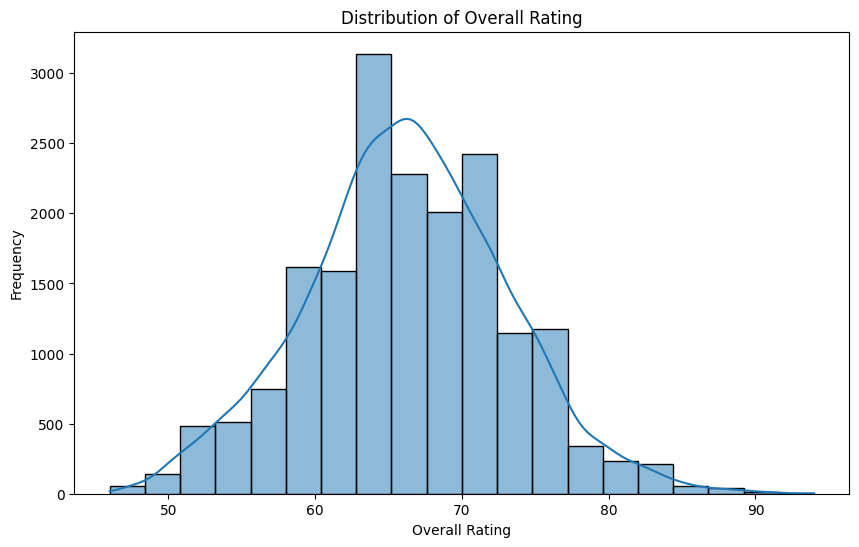

In [17]:
# Plot the distribution of Overall rating for all players
plt.figure(figsize=(10, 6))
sns.histplot(fifa_df['Overall'], kde=True, bins=20)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Retrieve names of top 20 players based on Overall rating
top_20_players = fifa_df.nlargest(20, 'Overall')['Name']
print(top_20_players)


0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object


In [19]:
# Generate a dataframe with all information of top 20 players
top_20_players_info = fifa_df.nlargest(20, 'Overall')
print(top_20_players_info)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

In [20]:
# Calculate average Age and Wage of top 20 players
average_age = top_20_players_info['Age'].mean()
average_wage = top_20_players_info['Wage'].mean()
print("Average Age of top 20 players:", average_age)
print("Average Wage of top 20 players:", average_wage)

Average Age of top 20 players: 28.3
Average Wage of top 20 players: 289700.0


In [21]:
# Player with the highest wage among top 20 players
highest_wage_player = top_20_players_info.loc[top_20_players_info['Wage'].idxmax(), ['Name', 'Wage']]
print("Player with the highest wage among top 20 players:", highest_wage_player)

Player with the highest wage among top 20 players: Name    L. Messi
Wage    565000.0
Name: 0, dtype: object


In [22]:
# Generate dataframe with "Player Name", "Club Name", "Wage", and "Overall Rating"
player_club_wage_overall = fifa_df[['Name', 'Club', 'Wage', 'Overall']]

In [23]:
print(player_club_wage_overall.head())

                Name                 Club      Wage  Overall
0           L. Messi         FC Barcelona  565000.0       94
1  Cristiano Ronaldo             Juventus  405000.0       94
2          Neymar Jr  Paris Saint-Germain  290000.0       92
3             De Gea    Manchester United  260000.0       91
4       K. De Bruyne      Manchester City  355000.0       91


In [24]:
# Calculate average Overall rating for each club
average_overall_rating_per_club = player_club_wage_overall.groupby('Club')['Overall'].mean()

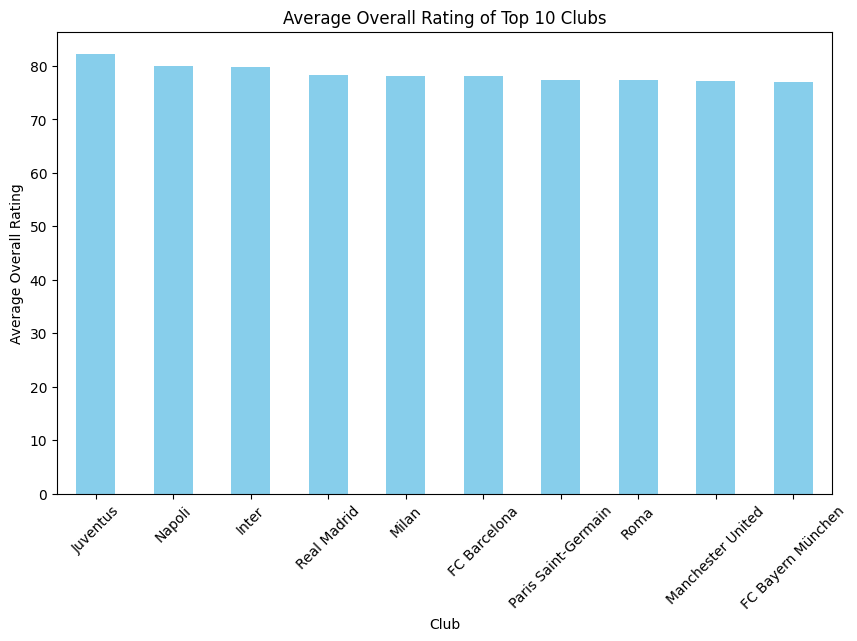

In [25]:
# Display average overall rating of Top 10 Clubs using a plot
top_10_clubs_average_overall = average_overall_rating_per_club.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_clubs_average_overall.plot(kind='bar', color='skyblue')
plt.title('Average Overall Rating of Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.show()

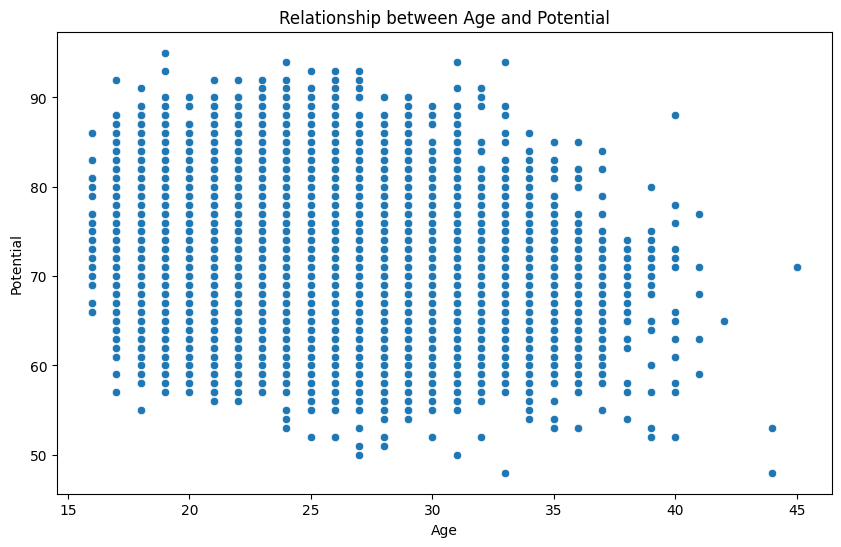

In [26]:
# Visualize relationship between Age and Potential
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=fifa_df)
plt.title('Relationship between Age and Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

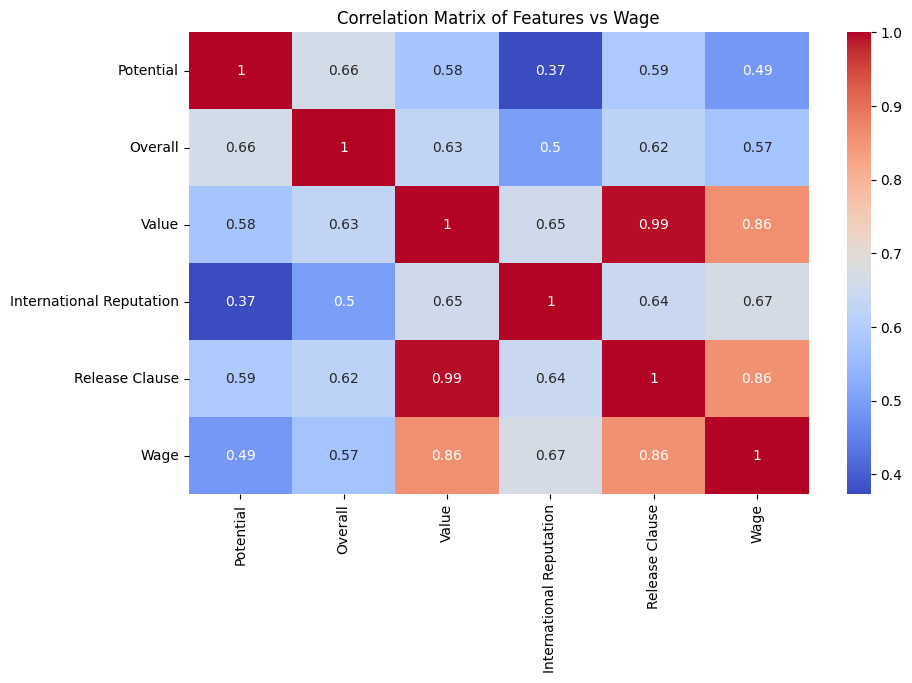

In [27]:
# Plot features contributing to player wages
features = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']
correlation_matrix = fifa_df[features + ['Wage']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features vs Wage')
plt.show()

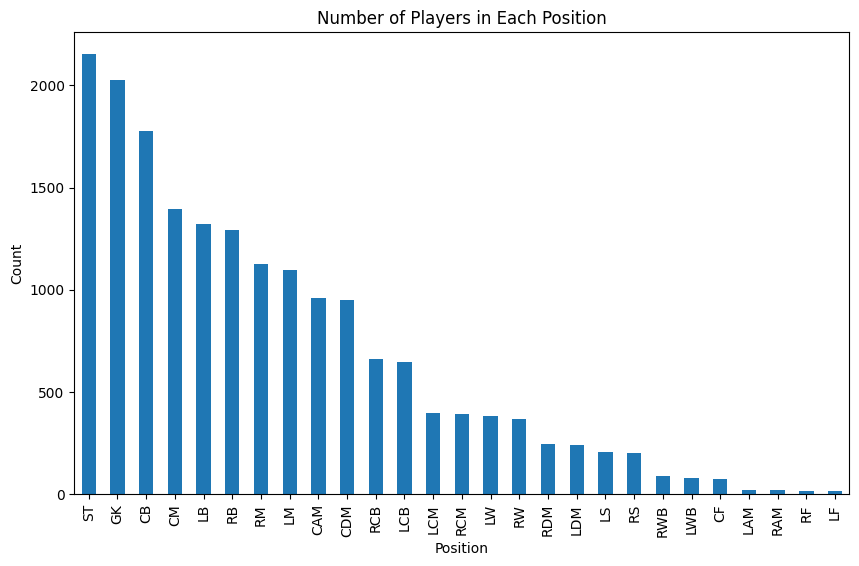

In [28]:
# Find position with maximum and minimum number of players
plt.figure(figsize=(10, 6))
fifa_df['Position'].value_counts().plot(kind='bar')
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

In [29]:
# Players from club 'Juventus' with wage > 200K
juventus_players = fifa_df[(fifa_df['Club'] == 'Juventus') & (fifa_df['Wage'] > 200000)]
print(juventus_players)

        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1             31.0          23.0      7.0       11.0       15.0   
15            20.0          20.0      5.0        4.0        4.0   
24            93.0          90.0      3.0        3.0        2.0   

    GKPositioning GKReflexes Release Clause  
1            14.0       11.0    127100000.0  
15            5.0        8.0    153500000.0  

In [30]:
# Generate dataframe containing top 5 players by Overall rating for each unique position
top_5_players_by_position = fifa_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
print(top_5_players_by_position)

         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

In [31]:
# Calculate average wage for top 5 players in every position
average_wage_per_position = top_5_players_by_position.groupby('Position')['Wage'].mean()
print(average_wage_per_position)

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
